<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/3_%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B2_Pytorch_05_10_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
#from sklearn.datasets import load_boston  # в Google Colab -
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.96997825, 0.55315554, 0.36762772],
       [0.08862402, 0.31169192, 0.96860184],
       [0.18339344, 0.8759282 , 0.68552963],
       [0.05962918, 0.84999416, 0.01725055],
       [0.12470424, 0.91500208, 0.0971876 ]])

In [ ]:
# размеры массива
a.shape

(5, 3)

In [ ]:
# сложение
a + 5

array([[5.96997825, 5.55315554, 5.36762772],
       [5.08862402, 5.31169192, 5.96860184],
       [5.18339344, 5.8759282 , 5.68552963],
       [5.05962918, 5.84999416, 5.01725055],
       [5.12470424, 5.91500208, 5.0971876 ]])

In [ ]:
# матричное умножение
a @ a.T

array([[1.381989  , 0.61446237, 0.91443189, 0.53435977, 0.66282773],
       [0.61446237, 1.04319559, 0.95327807, 0.2869298 , 0.39038663],
       [0.91443189, 0.95327807, 1.27083424, 0.76729521, 0.89097104],
       [0.53435977, 0.2869298 , 0.76729521, 0.7263433 , 0.78685897],
       [0.66282773, 0.39038663, 0.89097104, 0.78685897, 0.86222538]])

In [ ]:
# среднее по колонкам
a.mean(axis=-1)

array([0.63025384, 0.45630593, 0.58161709, 0.30895796, 0.37896464])

In [ ]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE
square_numpy = np.arange(1, 10001)
square_numpy

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [ ]:
square_numpy2 = square_numpy * square_numpy
square_numpy2

array([        1,         4,         9, ...,  99960004,  99980001,
       100000000])

In [ ]:
total_sum = np.sum(square_numpy2)
total_sum

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [ ]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.1887, 0.0161, 0.8408],
        [0.7520, 0.8077, 0.6748],
        [0.6636, 0.7709, 0.2599],
        [0.6219, 0.1741, 0.9401],
        [0.7184, 0.1160, 0.7285]])

In [ ]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [ ]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [ ]:
# сложение
x + 5

tensor([[5.1887, 5.0161, 5.8408],
        [5.7520, 5.8077, 5.6748],
        [5.6636, 5.7709, 5.2599],
        [5.6219, 5.1741, 5.9401],
        [5.7184, 5.1160, 5.7285]])

In [ ]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.7428, 0.7222, 0.3562, 0.9106, 0.7499],
        [0.7222, 1.6732, 1.2971, 1.2426, 1.1254],
        [0.3562, 1.2971, 1.1023, 0.7912, 0.7555],
        [0.9106, 1.2426, 0.7912, 1.3008, 1.1518],
        [0.7499, 1.1254, 0.7555, 1.1518, 1.0602]])

In [ ]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.7428, 0.7222, 0.3562, 0.9106, 0.7499],
        [0.7222, 1.6732, 1.2971, 1.2426, 1.1254],
        [0.3562, 1.2971, 1.1023, 0.7912, 0.7555],
        [0.9106, 1.2426, 0.7912, 1.3008, 1.1518],
        [0.7499, 1.1254, 0.7555, 1.1518, 1.0602]])

In [ ]:
# поэлементное умножение
x * x

tensor([[3.5608e-02, 2.5899e-04, 7.0691e-01],
        [5.6546e-01, 6.5245e-01, 4.5533e-01],
        [4.4037e-01, 5.9436e-01, 6.7551e-02],
        [3.8676e-01, 3.0297e-02, 8.8376e-01],
        [5.1604e-01, 1.3450e-02, 5.3068e-01]])

In [ ]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.3485, 0.7448, 0.5648, 0.5787, 0.5209])

In [ ]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [ ]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
square_pytorch = torch.arange(1, 10001)
square_pytorch

tensor([    1,     2,     3,  ...,  9998,  9999, 10000])

In [ ]:
square_pytorch2 = square_pytorch * square_pytorch
square_pytorch2

tensor([        1,         4,         9,  ...,  99960004,  99980001,
        100000000])

In [ ]:
total_sum_pytorch = torch.sum(square_pytorch2)
total_sum_pytorch

tensor(333383335000)

In [ ]:
total_sum # сравниваем с суммой, высчитанной с помощью numpy

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [ ]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [ ]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.7649, 0.6594, 0.9272],
        [0.8256, 0.5511, 0.9062],
        [0.9470, 0.6395, 0.7838],
        [0.3987, 0.3407, 0.6246],
        [0.8089, 0.5952, 0.7558]])

In [ ]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [ ]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.2963,  0.3726,  1.1146],
        [-0.3091, -1.9569, -0.0907],
        [-0.6673,  1.3862,  2.4325],
        [-0.4404, -1.1598, -0.9070],
        [-0.0340,  0.7582,  0.6746]])

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [ ]:
x

tensor([[0.7308, 0.1200, 0.9264],
        [0.4747, 0.6905, 0.2413],
        [0.4320, 0.6695, 0.4654],
        [0.5652, 0.7984, 0.6687],
        [0.9706, 0.0531, 0.6694]])

In [ ]:
y

tensor([[0.1634, 0.8208, 0.8211],
        [0.4549, 0.3929, 0.8611],
        [0.5890, 0.3716, 0.7896],
        [0.6187, 0.1027, 0.0779],
        [0.4675, 0.0523, 0.7047]])

In [ ]:
# сложение
x + y

tensor([[0.8942, 0.9408, 1.7475],
        [0.9296, 1.0835, 1.1024],
        [1.0210, 1.0411, 1.2551],
        [1.1839, 0.9011, 0.7466],
        [1.4381, 0.1054, 1.3740]])

In [ ]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.8942, 0.9408, 1.7475],
        [0.9296, 1.0835, 1.1024],
        [1.0210, 1.0411, 1.2551],
        [1.1839, 0.9011, 0.7466],
        [1.4381, 0.1054, 1.3740]])

In [ ]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.8942, 0.9408, 1.7475],
        [0.9296, 1.0835, 1.1024],
        [1.0210, 1.0411, 1.2551],
        [1.1839, 0.9011, 0.7466],
        [1.4381, 0.1054, 1.3740]])

In [ ]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [ ]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [ ]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [ ]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [ ]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [ ]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [ ]:
# в Google Colab -
#from sklearn.datasets import load_boston
#boston = load_boston()
#plt.scatter(boston.data[:, -1], boston.target);

In [137]:
# в Google Colab +
class Boston():
  def __init__(self, data = None, target= None):
    self.data = data
    self.target = target
boston = Boston()

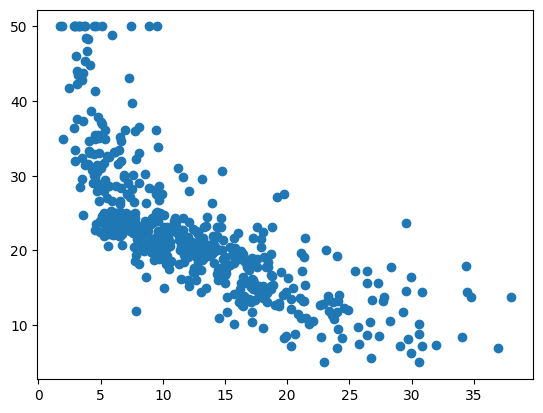

In [138]:
# в Google Colab +
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston.data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston.target = raw_df.values[1::2, 2]
plt.scatter(boston.data[:, -1], boston.target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

![torch_grad.png](attachment:torch_grad.png)

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [139]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [140]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [141]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()
loss

tensor(553.7262, grad_fn=<MeanBackward0>)

In [142]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.8648])
dL/db = tensor([-43.2985])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [143]:
w.data, w.grad

(tensor([0.2416]), tensor([-11.8648]))

In [144]:
w

tensor([0.2416], requires_grad=True)

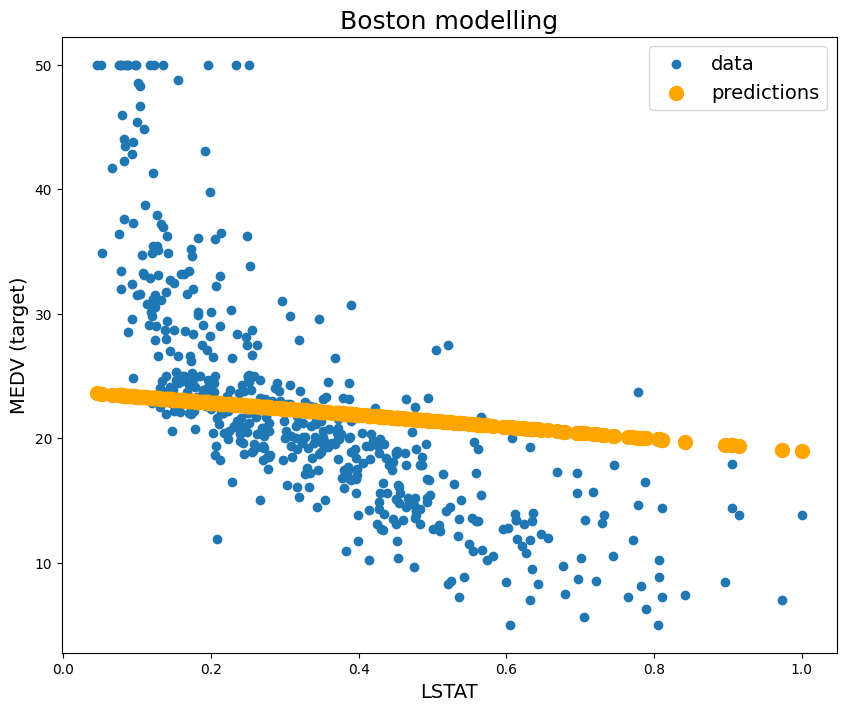

loss =  72.975


In [145]:
from IPython.display import clear_output

for i in range(100):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [146]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [147]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [148]:
our_dataset = RandomDataset(x, y)

In [149]:
our_dataset.__getitem__(1)

{'sample': tensor([0.4290, 0.6549, 0.5182, 0.6749, 0.5699]),
 'target': 0.9193842320026285}

In [150]:
print(len(our_dataset))
print(our_dataset[1])

1000
{'sample': tensor([0.4290, 0.6549, 0.5182, 0.6749, 0.5699]), 'target': 0.9193842320026285}


Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [151]:
#batch = next(iter(dataloader))
for batch in dataloader:
  print(f"Sample:\n{batch['sample']}")
  print(f"Target:\n{batch['target']}")
  break

Sample:
tensor([[0.8029, 0.3894, 0.0735, 0.0122],
        [0.1154, 0.0708, 0.6528, 0.9842],
        [0.7613, 0.5605, 0.0582, 0.0776],
        [0.8918, 0.1242, 0.7207, 0.5450]])
Target:
tensor([0.4063, 0.7471, 0.8580, 0.5244], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [152]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 30 на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 30 нейронами на вход и 1 на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [153]:
y_pred = another_model(batch["sample"])  # получили предсказания модели
y_pred

RuntimeError: ignored

#### Как написать цикл обучения и отслеживать метрики

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [21]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100%|██████████| 9912422/9912422 [00:00<00:00, 119855833.11it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85246793.68it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29468198.03it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3022933.79it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



60000


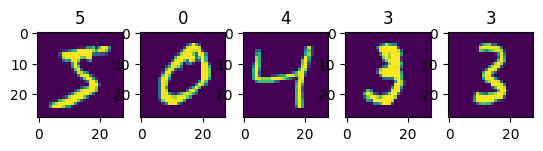

In [22]:
# посмотрим на то, с чем мы работаем
print(len(mnist_train))
p = [0, 1, 2, 10, 50000]
for i in range(len(p)):
    plt.subplot(1, len(p), i + 1)
    plt.imshow(mnist_train[p[i]][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[p[i]][1]))
plt.show()


In [23]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [24]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0166, -0.0176, -0.0325,  ...,  0.0182,  0.0327,  0.0102],
          [-0.0141, -0.0058,  0.0059,  ...,  0.0205, -0.0047, -0.0355],
          [ 0.0064,  0.0347,  0.0263,  ..., -0.0025, -0.0064,  0.0231],
          ...,
          [ 0.0060, -0.0180, -0.0223,  ..., -0.0184, -0.0302, -0.0139],
          [ 0.0141, -0.0294,  0.0204,  ...,  0.0308,  0.0192,  0.0298],
          [-0.0331,  0.0154,  0.0304,  ...,  0.0258,  0.0268, -0.0063]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0042,  0.0314,  0.0177,  0.0045,  0.0276, -0.0082, -0.0222,  0.0232,
           0.0220, -0.0295,  0.0101, -0.0226, -0.0156,  0.0073, -0.0234,  0.0297,
           0.0088,  0.0158,  0.0038, -0.0137,  0.0117, -0.0274, -0.0131,  0.0171,
           0.0303,  0.0076,  0.0022,  0.0032,  0.0241, -0.0096,  0.0044, -0.0218,
          -0.0181, -0.0017,  0.0031,  0.0100,  0.0092, -0.0272, -0.0258,  0.0090,
          -0.0057,  0.0156, -0.0299, 

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [25]:
!pip install wandb --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [26]:
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: murpunk (team_murpunk). Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [27]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )


        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10751901566982269, accuracy: 0.9666


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09115952998399734, accuracy: 0.9733


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08887231349945068, accuracy: 0.9747


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)

# Задание 2

Прочитайте главу 2 (стр. 38–58) книги [1]. Можно также смотреть другую литературу. По материалам занятия и рекомендованной литературы ответьте на вопросы:
1. Что такое загрузчик данных и что задает параметр batch?
2. Что такое функция активации, какие функции активации знаете?
3. Что такое функция потерь, какие функции потерь знаете?

[1] Пойнтер Ян. Программируем с PyTorch: Создание приложений глубокого обучения. — СПб.: Питер, 2020. — 256 с.

### 1
**Загрузчик данных** — инструмент, который передаёт данные из набора данных в нейронную сеть. Может включать в себя такую информацию: *Сколько рабочих процессов передают данные в нейронную сеть? Сколько изображений передаётся одновременно?*

Загрузчик данных позволяет работать с разными типами данных: изображениями, текстом, аудио и др.

**batch_size** — количество изображений, которые пройдут через нейронную сеть.

По умолчанию этот параметр установлен на 1. Можно сделать его больше, но следить за тем, чтобы память не заполнилась.


### 2
**Функция активации** — способ введения нелинейности в нейросеть. Другими словами, функция активации — это математическая функция, которая добавляется в каждый узел (нейрон) скрытого слоя нейронной сети. Она определяет, какая доля входящего сигнала будет передана на выход нейрона. Благодаря этому возникает нелинейность.

*ReLU* — самая распространённая функция активации.
*softmax* — многомерная логистическая функция.
*Логистическая функция* — относится к сигмоидальным функциям.
*ELU* — функция активации, которая позволяет модели использовать отрицательные значения.

### 3
**Функция потерь** — математическая функция, которая используется в машинном обучении для оценки того, насколько хорошо модель справляется с предсказанием целевой переменной.

*Квадратичная функция потерь* — используется в задачах регрессии.

*Кросс-энтропия* — используется в задачах классификации, особенно бинарной классификации.

*Логистическая функция потерь* — применяется в задачах бинарной классификации.

# Задание 3
Поменяйте количество нейронов в скрытых слоях в примере из семинара. Как это влияет на качество и скорость обучения?


In [ ]:
# изначальная модель
model = nn.Sequential()  # создаём пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили первый, линейный слой с 5-ю нейронами на вход и 30 на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили выходной слой с 30 нейронами на вход и 1 на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

Результат такой: Epoch: 4, loss: 0.08849430829286575, accuracy: 0.9736

In [31]:
y_pred = another_model(batch["sample"])  # получили предсказания модели для одного набора нейронов
y_pred

tensor([[-0.1143],
        [-0.0892],
        [-0.0634],
        [-0.0893]], grad_fn=<AddmmBackward0>)

In [40]:
another_model2 = nn.Sequential(nn.Linear(5, 25), nn.ReLU(), nn.Linear(25, 1))

In [105]:
y_pred2 = another_model2(batch["sample"])  # получили предсказания модели для другого набора нейронов
y_pred2

tensor([[0.1402],
        [0.2405],
        [0.1385],
        [0.1905]], grad_fn=<AddmmBackward0>)

Добавьте слой в нейронную сеть.

In [28]:
# добавила ещё один линейный слой и ReLU (128 заменила на 256)
model2 = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 256
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 256
    nn.ReLU(),  # нелинейность
        nn.Linear(
        256, 128
    ),  # линейный слой, преобразующий вектор размера 256 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model2.parameters(), lr=0.05)

In [ ]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model2(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )


        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.08849430829286575, accuracy: 0.9736


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08849430829286575, accuracy: 0.9736


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08849430829286575, accuracy: 0.9736


Поменяйте функцию активации.

In [42]:
# Поменяла ReLu на Softmax
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 30 на выход
model.add_module("l2", nn.Softmax())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 30 нейронами на вход и 1 на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.Softmax(), nn.Linear(30, 1))

In [44]:
y_pred = another_model(batch["sample"])  # получили предсказания модели
y_pred

tensor([[-0.0513],
        [-0.0549],
        [-0.0514],
        [-0.0555]], grad_fn=<AddmmBackward0>)

Поменяйте функцию потерь.

## Выводы

Если менять количество слоёв, то тензор y_pred изменится с отрицательных значений на положительные.

In [106]:
y_pred, y_pred2

(tensor([[-0.0080, -0.0038, -0.0544, -0.0096,  0.0140,  0.0036,  0.0935,  0.0163,
           0.0433, -0.0942],
         [-0.0915,  0.0439,  0.0309, -0.0548, -0.0654,  0.0226,  0.0527,  0.0515,
           0.0292,  0.0090],
         [-0.0489, -0.0357,  0.0229,  0.0077,  0.0983, -0.0039,  0.0615,  0.0994,
           0.1047, -0.1373],
         [-0.1038,  0.0514, -0.0887,  0.1366, -0.0575,  0.0516,  0.0575,  0.0046,
           0.0568, -0.0982]], grad_fn=<AddmmBackward0>),
 tensor([[0.1402],
         [0.2405],
         [0.1385],
         [0.1905]], grad_fn=<AddmmBackward0>))

Если добавить слов, loss и точность не меняются:  loss: 0.08849430829286575, accuracy: 0.9736

При изменении функции потерь с MSE (loss) на cross-entropy, он изменился с 553.7262 на loss: 0.08887231349945068.